In [91]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import os
import pickle
%matplotlib inline

# ORB

### ORB is a feature detector and descriptor

RB(Oriented FAST and Rotated BRIEF) is a fast binary descriptor based on the combination of theFAST (Features from Accelerated SegmentTest) keypoint detector, and the BRIEF (Binary robustindependentelementary features) descriptor.  It is rotation invariant and robust to noise.

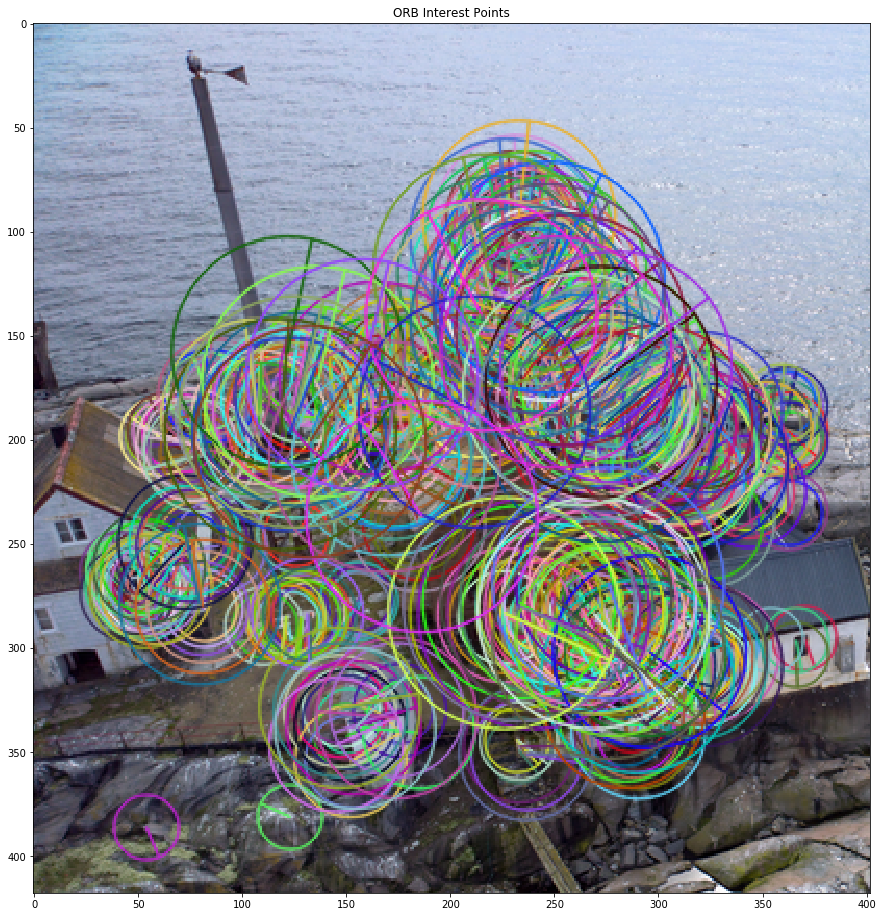

In [92]:
dataset_path = '../Image_Pairs'
img = cv2.imread(os.path.join(dataset_path, 'torb_small2.png'))
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV  backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img, None)
img_keypoints = cv2.drawKeypoints(img, 
                                    key_points, 
                                    img, 
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
plt.figure(figsize=(16, 16))
plt.title('ORB Interest Points')
plt.imshow(img_keypoints); plt.show()


The found interest points/features are circled in the image above. 

In [93]:


# Find the keypoints with ORB
keypoints = orb.detect(img, None)

# Print number of keypoints detected
print("Number of keypoints Detected:", len(keypoints), "\n")



('Number of keypoints Detected:', 500, '\n')


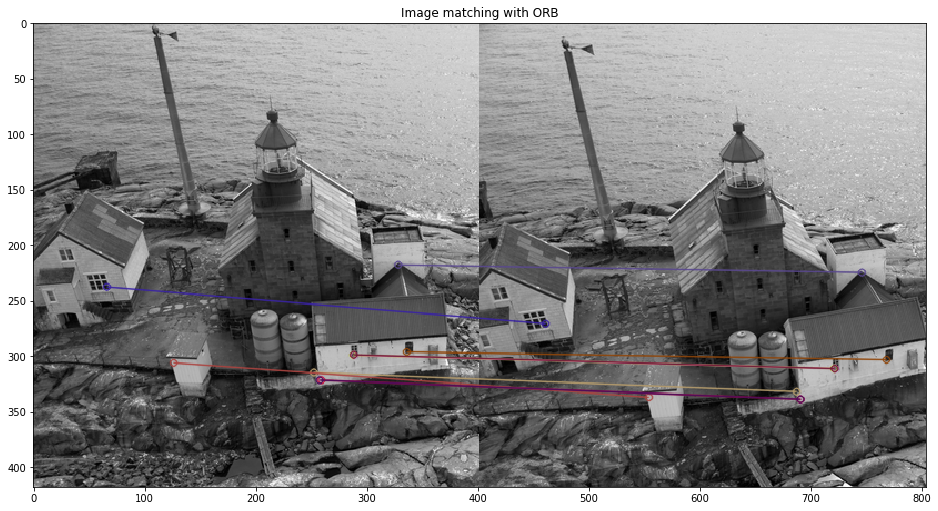

In [94]:
def image_detect_and_compute(detector, img_name):
    """Detect and compute interest points and their descriptors."""
    img = cv2.imread(os.path.join(dataset_path, img_name))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    kp, des = detector.detectAndCompute(img, None)
    return img, kp, des
    

def draw_image_matches(detector, img1_name, img2_name, nmatches=10):
    """Draw ORB feature matches of the given two images."""
    img1, kp1, des1 = image_detect_and_compute(detector, img1_name)
    img2, kp2, des2 = image_detect_and_compute(detector, img2_name)
    if detector_used == 1:
        bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=False)

    else:
        bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)
    
    matches = bf.match(des1, des2)
    matches = sorted(matches, key = lambda x: x.distance) # Sort matches by distance.  Best come first.
    
    img_matches = cv2.drawMatches(img1, kp1, img2, kp2, matches[:nmatches], img2, flags=2) # Show top 10 matches
    plt.figure(figsize=(16, 16))
    if detector_used == 1:
        plt.title("Image matching with ORB")
    else:
        plt.title("Image matching with KAZE")
    plt.imshow(img_matches); plt.show()
    
detector_used=1
orb = cv2.ORB_create()
draw_image_matches(orb, 'torb_small1.png', 'torb_small2.png')

In [95]:
N_kp_ORB = []
for i in range(100):
    img = cv2.imread(os.path.join(dataset_path, 'torb_small1.png'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

    orb = cv2.ORB_create()  # OpenCV  backward incompatibility: Do not create a detector with `cv2.ORB()`.
    key_points, description = orb.detectAndCompute(img, None)
    img_keypoints = cv2.drawKeypoints(img, 
                                    key_points, 
                                    img, 
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
    N_kp_ORB.append(len(orb.detect(img, None)))

[500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500, 500]


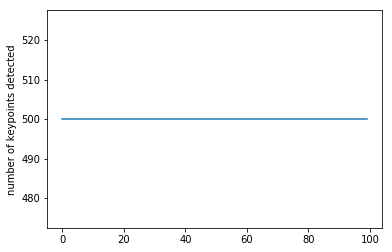

In [98]:
plt.plot(N_kp_ORB)
print(N_kp_ORB)
plt.ylabel('number of keypoints detected')
plt.show()

## KAZE

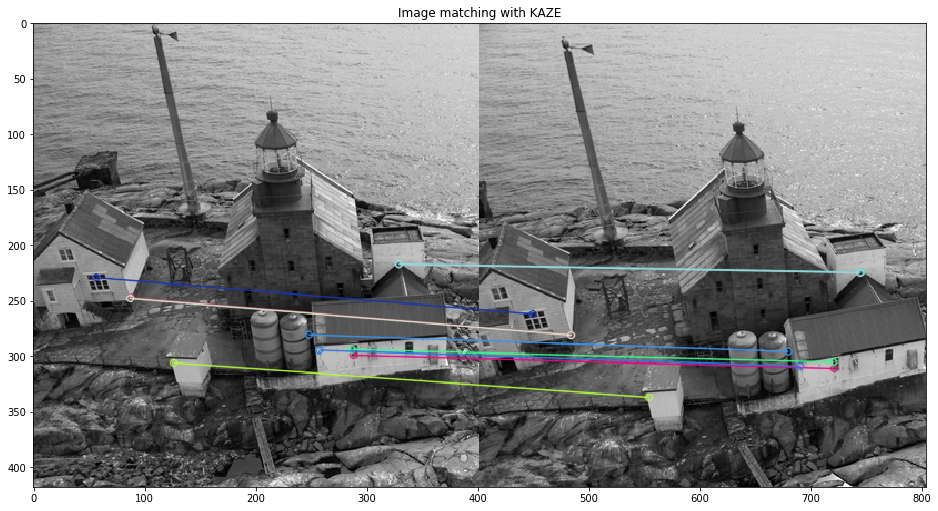

In [72]:
detector_used=0
KAZE = cv2.KAZE_create()
draw_image_matches(orb, 'torb_small1.png', 'torb_small2.png')

repetability

In [89]:
N_kp_KAZE = []
for i in range(100):
    img = cv2.imread(os.path.join(dataset_path, 'torb_small1.png'))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

    kaze = cv2.KAZE_create()  # OpenCV  backward incompatibility: Do not create a detector with `cv2.ORB()`.
    key_points, description = orb.detectAndCompute(img, None)
    img_keypoints = cv2.drawKeypoints(img, 
                                    key_points, 
                                    img, 
                                    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
    N_kp_KAZE.append(len(kaze.detect(img, None)))

[1004, 1112, 1051, 1000, 1035, 1058, 1046, 1092, 1148, 1031, 1053, 1089, 1093, 1018, 1083, 1116, 1047, 1095, 1069, 1093, 1183, 974, 1152, 1085, 1113, 1188, 1160, 1108, 1061, 1061, 1025, 1098, 1148, 1100, 1156, 1062, 1022, 939, 1022, 1009, 1024, 1093, 1084, 1174, 1070, 1013, 1203, 1018, 1047, 1037, 981, 1075, 1052, 1150, 942, 1129, 1156, 1055, 1013, 1058, 1063, 1031, 960, 1145, 991, 1067, 1084, 953, 973, 1100, 1091, 1018, 974, 1010, 1090, 984, 1083, 1063, 1001, 1048, 1093, 1027, 1053, 1097, 1117, 1099, 1069, 1074, 1023, 1065, 1080, 1072, 1052, 1024, 1107, 1186, 981, 1071, 945, 1137]


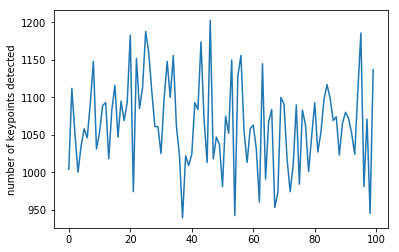

In [97]:
plt.plot(N_kp_KAZE)
print(N_kp_KAZE)
plt.ylabel('number of keypoints detected')
plt.show()